In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import torch
from torchvision import datasets, transforms, models  # datsets  , transforms
from torch.utils.data.sampler import SubsetRandomSampler
import torch.nn as nn
import torch.nn.functional as F
from datetime import datetime


<IPython.core.display.Javascript object>

In [ ]:
%pip install nb-black
%load_ext nb_black


In [ ]:
transform = transforms.Compose(
    [transforms.Resize(255), transforms.CenterCrop(224), transforms.ToTensor()]
)


<IPython.core.display.Javascript object>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
dataset = datasets.ImageFolder("/content/drive/MyDrive/Plant_leaf_diseases_dataset_with_augmentation/Plant_leave_diseases_dataset_with_augmentation", transform=transform)


In [ ]:
dataset


Dataset ImageFolder
    Number of datapoints: 4362
    Root location: /content/drive/MyDrive/Plant_leaf_diseases_dataset_with_augmentation/Plant_leave_diseases_dataset_with_augmentation
    StandardTransform
Transform: Compose(
               Resize(size=255, interpolation=bilinear, max_size=None, antialias=None)
               CenterCrop(size=(224, 224))
               ToTensor()
           )

<IPython.core.display.Javascript object>

In [ ]:
indices = list(range(len(dataset)))


<IPython.core.display.Javascript object>

In [ ]:
split = int(np.floor(0.85 * len(dataset)))  # train_size

<IPython.core.display.Javascript object>

In [ ]:
validation = int(np.floor(0.70 * split))  # validation

<IPython.core.display.Javascript object>

In [ ]:
print(0, validation, split, len(dataset))

0 2594 3707 4362


<IPython.core.display.Javascript object>

In [ ]:
print(f"length of train size :{validation}")
print(f"length of validation size :{split - validation}")
print(f"length of test size :{len(dataset)-validation}")

length of train size :2594
length of validation size :1113
length of test size :1768


<IPython.core.display.Javascript object>

In [ ]:
np.random.shuffle(indices)

<IPython.core.display.Javascript object>

In [ ]:
train_indices, validation_indices, test_indices = (
    indices[:validation],
    indices[validation:split],
    indices[split:],
)

<IPython.core.display.Javascript object>

In [ ]:
train_sampler = SubsetRandomSampler(train_indices)
validation_sampler = SubsetRandomSampler(validation_indices)
test_sampler = SubsetRandomSampler(test_indices)

<IPython.core.display.Javascript object>

In [ ]:
targets_size = len(dataset.class_to_idx)

<IPython.core.display.Javascript object>

In [ ]:
class CNN(nn.Module):
    def __init__(self, K):
        super(CNN, self).__init__()
        self.conv_layers = nn.Sequential(
            # conv1
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(2),
            # conv2
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            
            nn.MaxPool2d(2),
            nn.MaxPool2d(2),
            nn.MaxPool2d(2),
            nn.MaxPool2d(2),
        )

        self.dense_layers = nn.Sequential(
            nn.Dropout(0.4),
            nn.Linear(3136, K),

              )

    def forward(self, X):
        out = self.conv_layers(X)

        # Flatten
        out = out.view(-1, 3136)

        # Fully connected
        out = self.dense_layers(out)

        return out

<IPython.core.display.Javascript object>

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cpu


<IPython.core.display.Javascript object>

In [ ]:
device = "cpu"

<IPython.core.display.Javascript object>

In [ ]:
model = CNN(targets_size)

<IPython.core.display.Javascript object>

In [ ]:
model.to(device)

CNN(
  (conv_layers): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mo

<IPython.core.display.Javascript object>

In [ ]:
from torchsummary import summary

summary(model, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 224, 224]             896
              ReLU-2         [-1, 32, 224, 224]               0
       BatchNorm2d-3         [-1, 32, 224, 224]              64
            Conv2d-4         [-1, 32, 224, 224]           9,248
              ReLU-5         [-1, 32, 224, 224]               0
       BatchNorm2d-6         [-1, 32, 224, 224]              64
         MaxPool2d-7         [-1, 32, 112, 112]               0
            Conv2d-8         [-1, 64, 112, 112]          18,496
              ReLU-9         [-1, 64, 112, 112]               0
      BatchNorm2d-10         [-1, 64, 112, 112]             128
           Conv2d-11         [-1, 64, 112, 112]          36,928
             ReLU-12         [-1, 64, 112, 112]               0
      BatchNorm2d-13         [-1, 64, 112, 112]             128
        MaxPool2d-14           [-1, 64,

<IPython.core.display.Javascript object>

In [ ]:
criterion = nn.CrossEntropyLoss()  # this include softmax + cross entropy loss
optimizer = torch.optim.Adam(model.parameters())

<IPython.core.display.Javascript object>

In [ ]:
def batch_gd(model, criterion, train_loader, validation_loader, epochs):
    train_losses = np.zeros(epochs)
    validation_losses = np.zeros(epochs)

    for e in range(epochs):
        t0 = datetime.now()
        train_loss = []
        for inputs, targets in train_loader:
            inputs, targets = inputs.to(device), targets.to(device)

            optimizer.zero_grad()

            output = model(inputs)

            loss = criterion(output, targets)

            train_loss.append(loss.item())  # torch to numpy world

            loss.backward()
            optimizer.step()

        train_loss = np.mean(train_loss)

        validation_loss = []

        for inputs, targets in validation_loader:

           inputs, targets = inputs.to(device), targets.to(device)

           output = model(inputs)

           loss = criterion(output, targets)

           validation_loss.append(loss.item())  # torch to numpy world

        validation_loss = np.mean(validation_loss)

        train_losses[e] = train_loss
        validation_losses[e] = validation_loss

        dt = datetime.now() - t0

        print(
               f"Epoch : {e+1}/{epochs} Train_loss:{train_loss:.3f} Test_loss:{validation_loss:.3f} Duration:{dt}"
            )
    return train_losses, validation_losses

<IPython.core.display.Javascript object>

In [ ]:
device = "cpu"

<IPython.core.display.Javascript object>

In [ ]:
batch_sizee = 256
train_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_sizee, sampler=train_sampler)
test_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_sizee, sampler=test_sampler)
validation_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_sizee, sampler=validation_sampler)

<IPython.core.display.Javascript object>

In [ ]:
train_losses, validation_losses = batch_gd(
    model, criterion, train_loader, validation_loader, 5
)


Epoch : 1/5 Train_loss:3.641 Test_loss:1.639 Duration:0:08:42.853401
Epoch : 2/5 Train_loss:1.029 Test_loss:0.649 Duration:0:01:41.301268
Epoch : 3/5 Train_loss:0.538 Test_loss:0.372 Duration:0:01:41.071038
Epoch : 4/5 Train_loss:0.416 Test_loss:0.319 Duration:0:01:40.897177
Epoch : 5/5 Train_loss:0.340 Test_loss:0.252 Duration:0:01:41.249995


<IPython.core.display.Javascript object>

In [ ]:
torch.save(model.state_dict() , 'plant_disease_model_1.pt')

<IPython.core.display.Javascript object>

In [ ]:
targets_size = 3
model = CNN(targets_size)
model.load_state_dict(torch.load("plant_disease_model_1.pt"))
model.eval()


CNN(
  (conv_layers): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mo

<IPython.core.display.Javascript object>

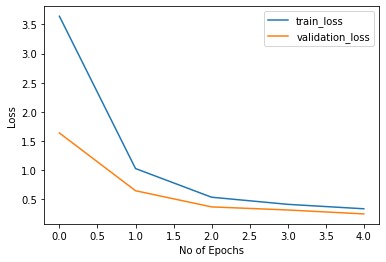

<IPython.core.display.Javascript object>

In [ ]:
plt.plot(train_losses , label = 'train_loss')
plt.plot(validation_losses , label = 'validation_loss')
plt.xlabel('No of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
def accuracy(loader):
    n_correct = 0
    n_total = 0

    for inputs, targets in loader:
        inputs, targets = inputs.to(device), targets.to(device)

        outputs = model(inputs)

        _, predictions = torch.max(outputs, 1)

        n_correct += (predictions == targets).sum().item()
        n_total += targets.shape[0]

    acc = n_correct / n_total
    return acc

<IPython.core.display.Javascript object>

In [ ]:
train_acc = accuracy(train_loader)
test_acc = accuracy(test_loader)
validation_acc = accuracy(validation_loader)

<IPython.core.display.Javascript object>

In [ ]:
print(
    f"Train Accuracy : {train_acc}\nTest Accuracy : {test_acc}\nValidation Accuracy : {validation_acc}"
)

Train Accuracy : 0.8581341557440246
Test Accuracy : 0.8442748091603054
Validation Accuracy : 0.8445642407906558


<IPython.core.display.Javascript object>

In [ ]:
transform_index_to_disease = dataset.class_to_idx

<IPython.core.display.Javascript object>

In [ ]:
transform_index_to_disease = dict(
    [(value, key) for key, value in transform_index_to_disease.items()]
)  # reverse the index

<IPython.core.display.Javascript object>

In [ ]:
data = pd.read_csv("disease_info.csv", encoding="cp1252")
print(data)

   index               disease_name
0      1              tomat_healthy
1      2          tomato_leaf_mould
2      3  tomato_septoria_leaf_spot


<IPython.core.display.Javascript object>

In [ ]:
from PIL import Image
import torchvision.transforms.functional as TF

<IPython.core.display.Javascript object>

In [ ]:
import tensorflow as tf
import torchvision.transforms as transforms

def single_prediction(image):
    # image = Image.open(image_path)
    image = image.resize((224, 224))
    transform = transforms.Compose([
    transforms.PILToTensor()
    ])
    input_data = transform(image)
    input_data = input_data.view((-1, 3, 224, 224))
    output = model(input_data.float())
    output = output.detach().numpy()
    index = np.argmax(output)
    # # print("Original : ", image_path[12:-4])
    pred_csv = data["disease_name"][index]
    print(pred_csv)

<IPython.core.display.Javascript object>

In [ ]:
image=Image.open('tomato_leaf_mould.JPG')
single_prediction(image)

print('test_results from own data')

image_test1=Image.open('testimage1.jpg')
single_prediction(image_test1)
image_test2=Image.open('testimage2.jpg')
single_prediction(image_test2)
image_test3=Image.open('testimage3.jpg')
single_prediction(image_test3)
image_test4=Image.open('testimage4.jpg')
single_prediction(image_test4)

tomato_leaf_mould
test_results from own data
tomato_leaf_mould
tomato_leaf_mould
tomato_leaf_mould
tomato_leaf_mould


<IPython.core.display.Javascript object>